# Project Deep Learning - Implementation and Hyperparameter tuning of the SAC Algorithm

In this notebook we show the results of the evaluations. However, the training of the network would take too long. Hence, we will use the pretrained networks in this notebook and will present the results of the each of the networks. We further did more extensive hyperparameter tests than described in this notebook. However, we chose to only show the most significant insights of our research.

In the following parts we will first give a small introduction in how to run our code base as well as the main structure of the git-repository.
Afterwards we show the different hyperparameter tests we did. To do so we will present the used hyperparameter ranges as well as the result from these test.

## Code needed to run this Notebook

## Structure of the code base and guide for self-training

The main file of execution of the repository is the ```main.py``` file in the root folder. In this file we are setting the default hyperparameters (```parameter``` variable). The given default values are then used for the argument parser. In the ```hyperparameter_space``` variable we then can then set ranges of the hyperparameters we want to train on. To be able to show deterministic behaviour we are setting a seed on numpy, pyTorch and the random package.

From here the ```train.py``` in the ```SAC_Implementation``` folder is called. In here the training of the SAC Algorithm is implemented (see method ```run_sac()```). The logic of the SAC Algorithm itself is defined in the ```SAC_Implementation/SACAlgorithm.py``` script. 

Within ever iteration of the hyperparameter tuning we are saving the model as well as the result of each respective run. With the ```hp_evaluation``` file we then can run post-analysises on the runs. 

The above described files are representing the core of the repository. For more information see the inline comments. 

In [26]:
from IPython.display import HTML
from hp_evaluation import load_and_display_model
import pandas as pd

def show_video(linklist):
    
    html_script = """<div style="display: flex; justify-content: center">"""
    for link in linklist:
        html_script += f"""<div style="display: flex, flex-direction: column">
                               <div align="center">{link['desc']}</div>
                               <video width="320" height="240" autoplay loop>
                                   <source src="{link['src']}" type="video/mp4">
                               </video>
                        </div>"""

    return HTML(html_script + "</div>")

def evaluate_rounds(file_name, parameters=['env_domain', 'env_task']):
    parameter = load_and_display_model("hp_trials", file_name, parameters, figsizes=(12,5))
    return pd.DataFrame(list(parameter)).T

In [27]:
show_video([{"desc": "Video 1", "src":"paper_videos/video_balance_working_episode_495.mp4"}, 
            {"desc": "Video 2", "src":"paper_videos/video_balance_working_episode_495.mp4"}])

# Hyperparameter Space Tuning

## Baseline Hyperparameter

To be able to study the impacts of each of the hyperparameter, we are using parameters which show the functionality of the implementation. We got to these information by comparing the hyperparameter of the original SAC paper, as well as by fellow implemenations.

For the ```Cartpole, Balance```, we get the following parameters.

| Parameter             | Description                                 | Init Value          |
|-----------------------|---------------------------------------------|---------------------|
| Hidden Dimension      | Dimension of Hidden Layers in the Networks  | 512                 |
| Learning Rate Actor   | Learning Rate of the Actor Network          | 5e-4                |
| Learning Rate Crtitic | Learning Rate of the Critic Network         | 1e-3                |
| Gamma                 | Weighting of future Rewards                 | 0.98                |
| Tau                   | Coefficient for Polyak Averaging            | 0.01                |
| Seed                  | Seed for deterministic behaviour            | 1                   |
| Frame-Skip            | Reusing Actions                             | Cartpole: 8 \\ Else: 4 |
| Replay Buffer Size    | Size of the Replay Buffer $D$               | 10^6                |
| Sample Batch Size     | Batch Size for the Updating of the networks | 128                 |
| Alpha Learning Rate   | Learning Rate used for Updating Alpha       | 1e-4                |

With these parameters, we get the following results:

Number of Rounds:  1


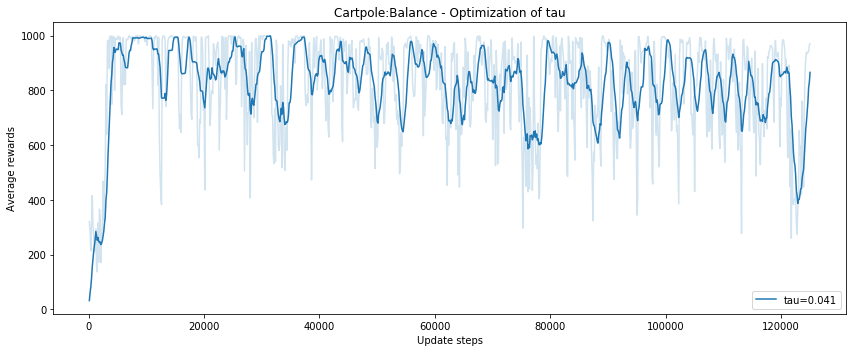

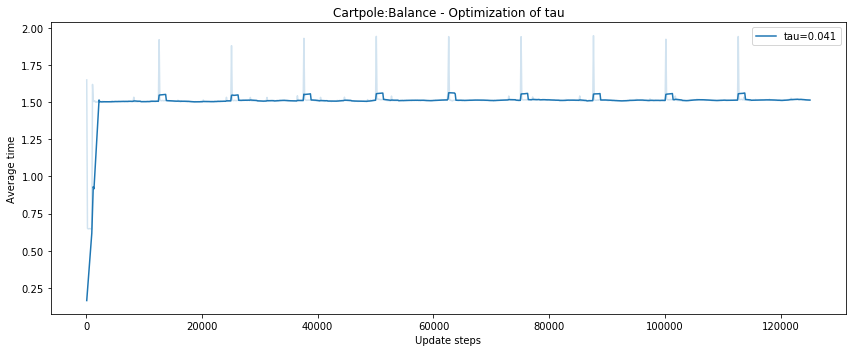

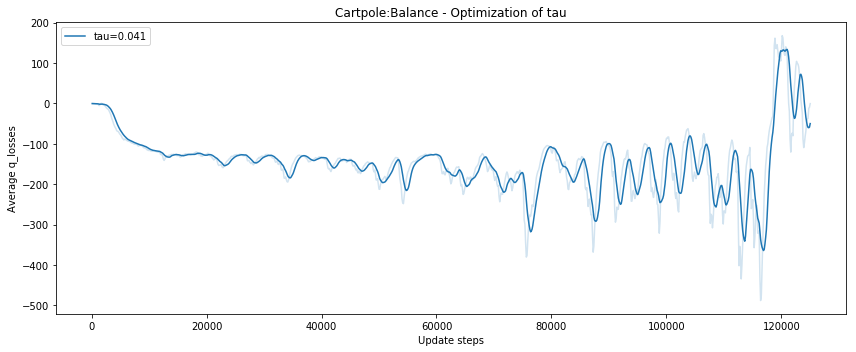

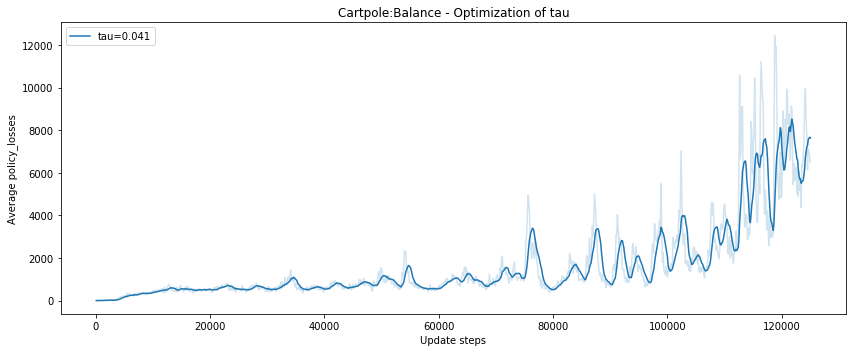

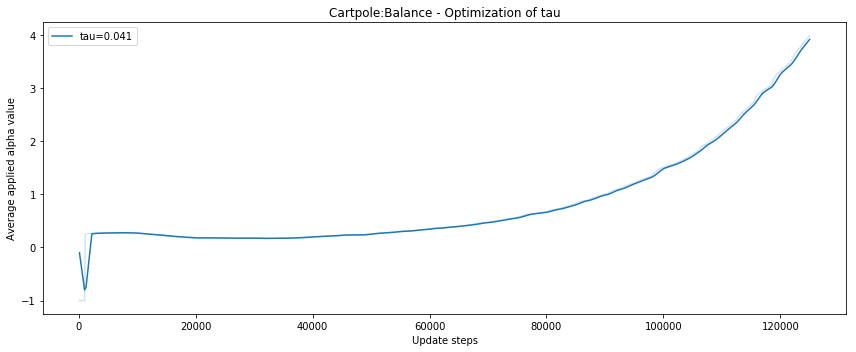

In [28]:
parameter = evaluate_rounds("cartpole_balance_tau__03_01_2021-12_41_33", ["tau"])

In [25]:
parameter

,0
alpha,0.01
alpha_beta,0.5
alpha_decay_deactivate,False
alpha_lr,0.0001
env_domain,cartpole
env_task,balance
episodes,1000
frame_skip,8
gamma,0.98
gpu_device,0


## Gamma $\gamma$ - Coefficient for future Rewards

ModuleNotFoundError: No module named 'imageio'

## Tau $\tau$ -  Factor for Polyak Averaging

In [16]:
from hp_evaluation import load_and_display_model
def evaluate_rounds(file_name, parameters=['env_domain', 'env_task']):
    parameter = load_and_display_model("hp_trials", file_name, parameters, figsizes=(12,5))
    return pd.DataFrame(list(parameter)).T, parameter

Number of Rounds:  1


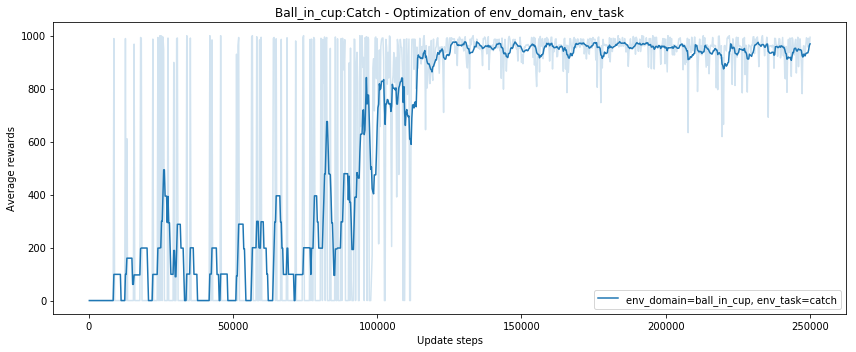

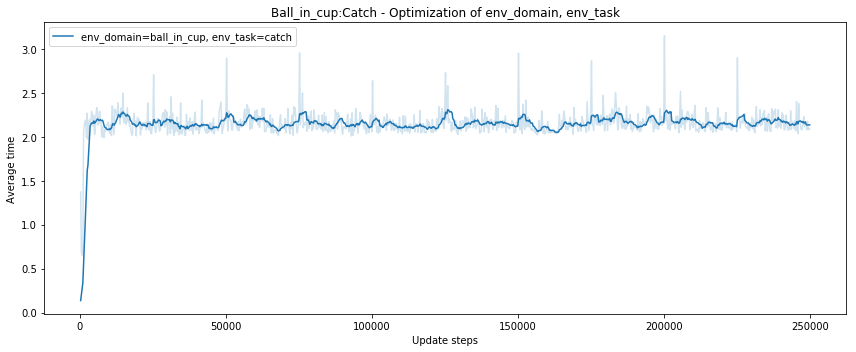

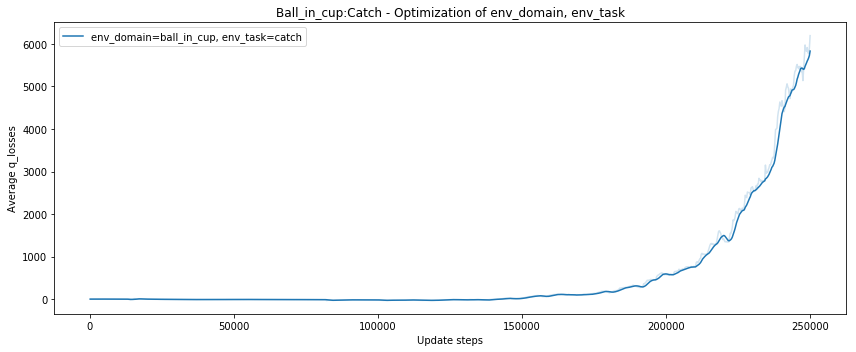

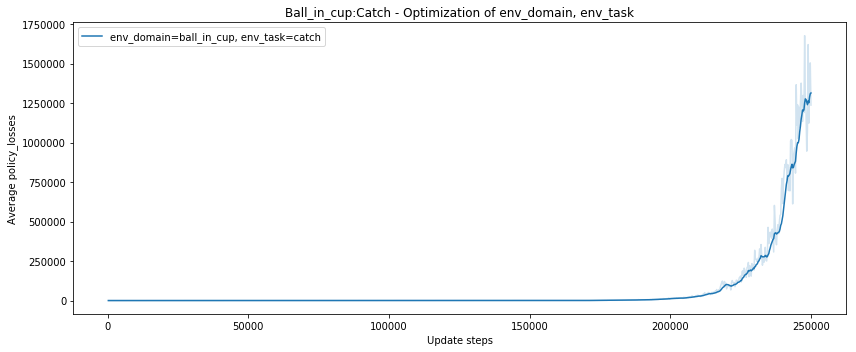

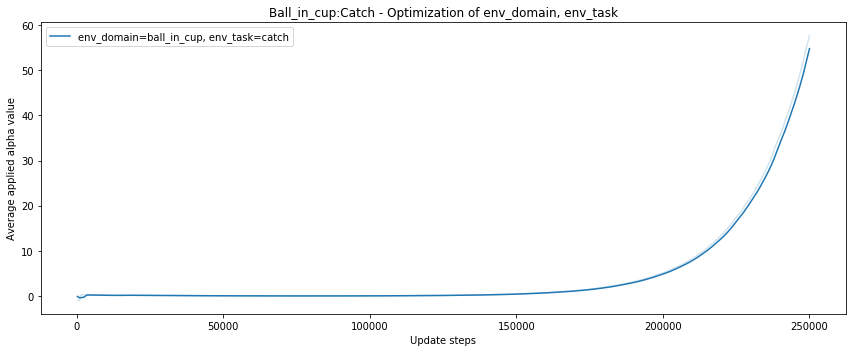

,0
alpha,0.01
alpha_beta,0.5
alpha_decay_deactivate,False
alpha_lr,0.0001
env_domain,ball_in_cup
env_task,catch
episodes,1000
frame_skip,4
gamma,0.98
gpu_device,0


## Alpha $\alpha$ and Alpha Decay

## Creation of RL-Networks

In [8]:
from SAC_Implementation.train import run_sac
run_sac(evaluate_rounds("ball_in_cup_static__02_01_2021-18_29_35")[1][0])

NameError: name 'show_video' is not defined

# Discussion